Name - Hitesh Choudhary

August-Batch

Project 1 -  Loan Prediction [ Basic ]

## Importing all required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

###  Reading data

In [ ]:
data = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")  # reading data
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
data.shape   # shape of data

(614, 13)

In [ ]:
data.describe()   # description of data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.info()   # information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
pd.crosstab(data['Gender'], data['Loan_Status'], margins = True)    # crosstab of gender and loan_status

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [ ]:
data.isna().sum()    # missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Filling Missing Value

In [ ]:
numeric_data = data.select_dtypes(include=[np.number])
categoric_data = data.select_dtypes(exclude=[np.number])

In [ ]:
numeric_data = numeric_data.fillna(numeric_data.median())
categoric_data = categoric_data.apply(lambda x: x.fillna(x.value_counts().index[0]))
data = pd.concat([categoric_data , numeric_data] ,axis=1, join='inner')   # concating numerical and categorical columns after filling missing values

## Data Analysis

In [ ]:
data['CATEGORY'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

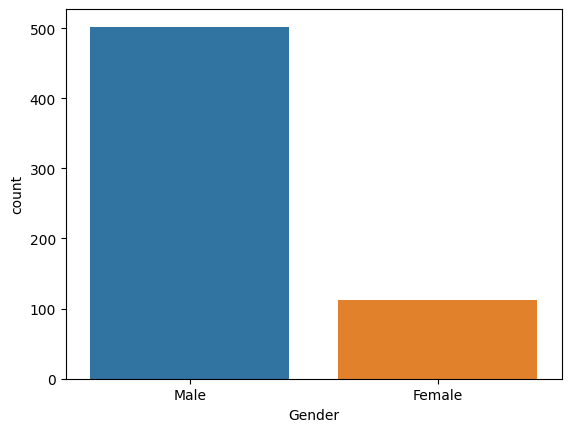

In [ ]:
sns.countplot(x = data['Gender'])
data['Gender'].value_counts()

<Axes: xlabel='LoanAmount', ylabel='ApplicantIncome'>

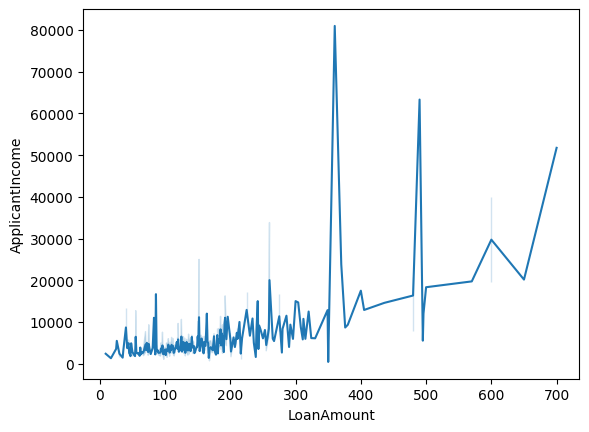

In [ ]:
sns.lineplot(x = data['LoanAmount'], y = data['ApplicantIncome'])

<Axes: xlabel='Education', ylabel='count'>

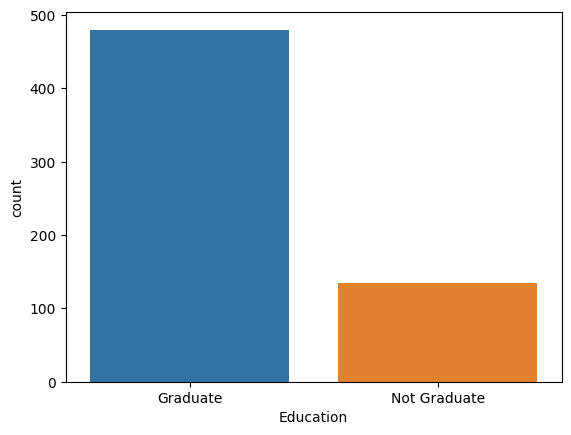

In [ ]:
sns.countplot(x=data['Education'], data = data['Loan_Status'])

<Axes: >

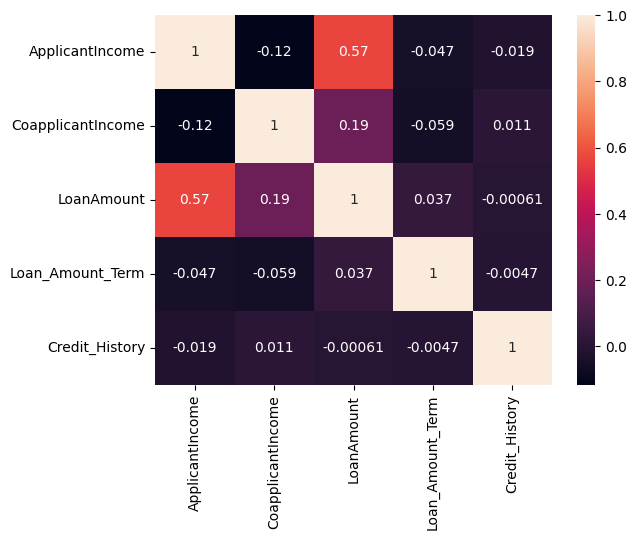

In [ ]:
sns.heatmap(data = data.corr(),annot=True)  # correlation of data

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

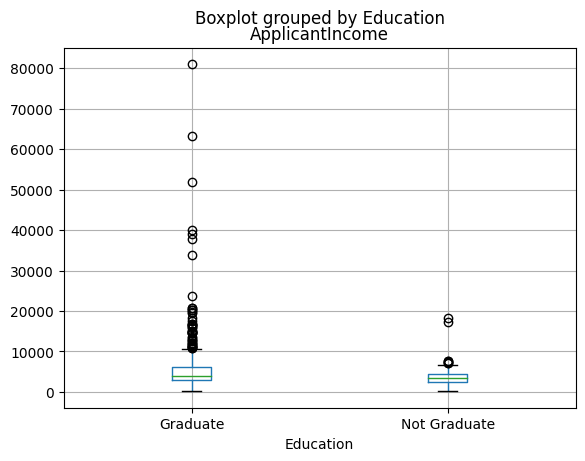

In [ ]:
data.boxplot(column = 'ApplicantIncome', by = 'Education' )

In [ ]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']     # creating new column 'Total_Income'
data = data.drop(columns = ['ApplicantIncome','CoapplicantIncome'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
0,LP001002,Male,No,0,Graduate,No,Urban,Y,128.0,360.0,1.0,5849.0
1,LP001003,Male,Yes,1,Graduate,No,Rural,N,128.0,360.0,1.0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y,66.0,360.0,1.0,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y,120.0,360.0,1.0,4941.0
4,LP001008,Male,No,0,Graduate,No,Urban,Y,141.0,360.0,1.0,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y,71.0,360.0,1.0,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y,40.0,180.0,1.0,4106.0
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y,253.0,360.0,1.0,8312.0
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y,187.0,360.0,1.0,7583.0


## Training Data

In [ ]:
x = data.drop(columns=['Loan_Status','Loan_ID'])
y = data.iloc[:,7:8]

In [ ]:
x = x.values
y = y.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 20)

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in range(0,6):
  x_train[:,i] = le.fit_transform(x_train[:,i])
  x_test[:,i] = le.fit_transform(x_test[:,i])

In [ ]:
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

## Scaling data using Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

## Training Machine Learning Algorithm and predicting

In [ ]:
from sklearn.linear_model import LogisticRegression      # Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)
accuracy_score(lr_pred, y_test)*100           # accuracy of Logistic Regression

74.79674796747967

In [ ]:
from sklearn.tree import DecisionTreeClassifier          # Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred  = dtc.predict(x_test)
accuracy_score(dtc_pred, y_test)*100          #  accuracy of Decision Tree Classifier algo

57.72357723577236

In [ ]:
from sklearn.naive_bayes import GaussianNB              # GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
accuracy_score (gnb_pred, y_test)*100            # accuracy of GaussianNB algo

74.79674796747967

## Following same procedure for test dataset for prediction

In [ ]:
test = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.shape

(367, 12)

In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
numeric_data_test = test.select_dtypes(include=[np.number])
categoric_data_test = test.select_dtypes(exclude=[np.number])

In [ ]:
numeric_data_test = numeric_data_test.fillna(numeric_data.median())
categoric_data_test = categoric_data_test.apply(lambda x: x.fillna(x.value_counts().index[0]))
test = pd.concat([categoric_data_test , numeric_data_test] ,axis=1, join='inner')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,LP001015,Male,Yes,0,Graduate,No,Urban,5720,0,110.0,360.0,1.0
1,LP001022,Male,Yes,1,Graduate,No,Urban,3076,1500,126.0,360.0,1.0
2,LP001031,Male,Yes,2,Graduate,No,Urban,5000,1800,208.0,360.0,1.0
3,LP001035,Male,Yes,2,Graduate,No,Urban,2340,2546,100.0,360.0,1.0
4,LP001051,Male,No,0,Not Graduate,No,Urban,3276,0,78.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,Urban,4009,1777,113.0,360.0,1.0
363,LP002975,Male,Yes,0,Graduate,No,Urban,4158,709,115.0,360.0,1.0
364,LP002980,Male,No,0,Graduate,No,Semiurban,3250,1993,126.0,360.0,1.0
365,LP002986,Male,Yes,0,Graduate,No,Rural,5000,2393,158.0,360.0,1.0


In [ ]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Property_Area        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [ ]:
test['Total_Income'] = test['ApplicantIncome'] +  test['CoapplicantIncome']
test = test.drop(columns=['Loan_ID','ApplicantIncome','CoapplicantIncome'])
test

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income
0,Male,Yes,0,Graduate,No,Urban,110.0,360.0,1.0,5720
1,Male,Yes,1,Graduate,No,Urban,126.0,360.0,1.0,4576
2,Male,Yes,2,Graduate,No,Urban,208.0,360.0,1.0,6800
3,Male,Yes,2,Graduate,No,Urban,100.0,360.0,1.0,4886
4,Male,No,0,Not Graduate,No,Urban,78.0,360.0,1.0,3276
...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,Urban,113.0,360.0,1.0,5786
363,Male,Yes,0,Graduate,No,Urban,115.0,360.0,1.0,4867
364,Male,No,0,Graduate,No,Semiurban,126.0,360.0,1.0,5243
365,Male,Yes,0,Graduate,No,Rural,158.0,360.0,1.0,7393


In [ ]:
test = test.values
for i in range(0,6):
  test[:,i] = le.fit_transform(test[:,i])

In [ ]:
test = ss.fit_transform(test)       # scaling test data

## Prediction of Loan

In [ ]:
pred_test = gnb.predict(test)                # Prediction using GaussianNB algorithm
pred_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,